In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [11]:
url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

for i in range(1, pages + 1):
    print(f"Scraping page {i}")
    url = f"{url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"
    response = requests.get(url)
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")



Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [15]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | Although like many these d...
1,✅ Trip Verified | This flight was British Airw...
2,Not Verified | The worst airline I have ever f...
3,"✅ Trip Verified | Disappointing service, pla..."
4,✅ Trip Verified | A transit visa is required...


In [25]:
df.to_csv("data/BA_reviews.csv")

In [29]:
Data = pd.read_csv("BA_reviews.csv")
Data.head(10)

,Unnamed: 0,reviews
0,0,✅ Trip Verified | Although like many these d...
1,1,✅ Trip Verified | This flight was British Airw...
2,2,Not Verified | The worst airline I have ever f...
3,3,"✅ Trip Verified | Disappointing service, pla..."
4,4,✅ Trip Verified | A transit visa is required...
5,5,✅ Trip Verified | I was surprised to receive...
6,6,"✅ Trip Verified | Flight cancelled, not refu..."
7,7,"✅ Trip Verified | I had visa issues, and hen..."
8,8,✅ Trip Verified | Singapore to Heathrow with...
9,9,✅ Trip Verified | I recently travelled from ...


In [52]:
data_cleaned = Data.drop(columns=["Unnamed: 0"], errors='ignore')

In [54]:
data_cleaned

,reviews
0,✅ Trip Verified | Although like many these d...
1,✅ Trip Verified | This flight was British Airw...
2,Not Verified | The worst airline I have ever f...
3,"✅ Trip Verified | Disappointing service, pla..."
4,✅ Trip Verified | A transit visa is required...
...,...
995,✅ Trip Verified | Really terrible user experi...
996,✅ Trip Verified | Very impressed with BA. Chec...
997,"✅ Trip Verified | LHR - SFO, LAS - LGW August..."
998,Not Verified | I flew from Malaga via LHR to...


In [58]:
df['reviews'] = df['reviews'].str.replace(r"✅ Trip Verified \|", "", regex=True)

In [60]:
print(df)

                                               reviews
0       Although like many these days, I avoid BA o...
1     This flight was British Airways at its very b...
2    Not Verified | The worst airline I have ever f...
3       Disappointing service, plane interior and t...
4       A transit visa is required for my partner t...
..                                                 ...
995    Really terrible user experience. British Air...
996   Very impressed with BA. Check in online was a...
997    LHR - SFO, LAS - LGW August 2023 in Club Wor...
998  Not Verified |   I flew from Malaga via LHR to...
999    Milan to Miami return via London. Worst busi...

[1000 rows x 1 columns]


In [74]:
df['reviews'] = df['reviews'].str.replace(r"Not Verified |\|", "", regex=True)

In [76]:
df

,reviews
0,"Although like many these days, I avoid BA o..."
1,This flight was British Airways at its very b...
2,The worst airline I have ever flown with. The...
3,"Disappointing service, plane interior and t..."
4,A transit visa is required for my partner t...
...,...
995,Really terrible user experience. British Air...
996,Very impressed with BA. Check in online was a...
997,"LHR - SFO, LAS - LGW August 2023 in Club Wor..."
998,I flew from Malaga via LHR to Boston on the...


In [84]:
df['reviews'] = df['reviews'].str.lower()

In [90]:
df

,reviews
0,"although like many these days, i avoid ba o..."
1,this flight was british airways at its very b...
2,the worst airline i have ever flown with. the...
3,"disappointing service, plane interior and t..."
4,a transit visa is required for my partner t...
...,...
995,really terrible user experience. british air...
996,very impressed with ba. check in online was a...
997,"lhr - sfo, las - lgw august 2023 in club wor..."
998,i flew from malaga via lhr to boston on the...


In [92]:
df['reviews'] = df['reviews'].str.strip()
print(df)

                                               reviews
0    although like many these days, i avoid ba on l...
1    this flight was british airways at its very be...
2    the worst airline i have ever flown with. they...
3    disappointing service, plane interior and terr...
4    a transit visa is required for my partner to t...
..                                                 ...
995  really terrible user experience. british airwa...
996  very impressed with ba. check in online was a ...
997  lhr - sfo, las - lgw august 2023 in club world...
998  i flew from malaga via lhr to boston on the 4t...
999  milan to miami return via london. worst busine...

[1000 rows x 1 columns]


In [94]:
df.to_csv('output.csv', index=False)

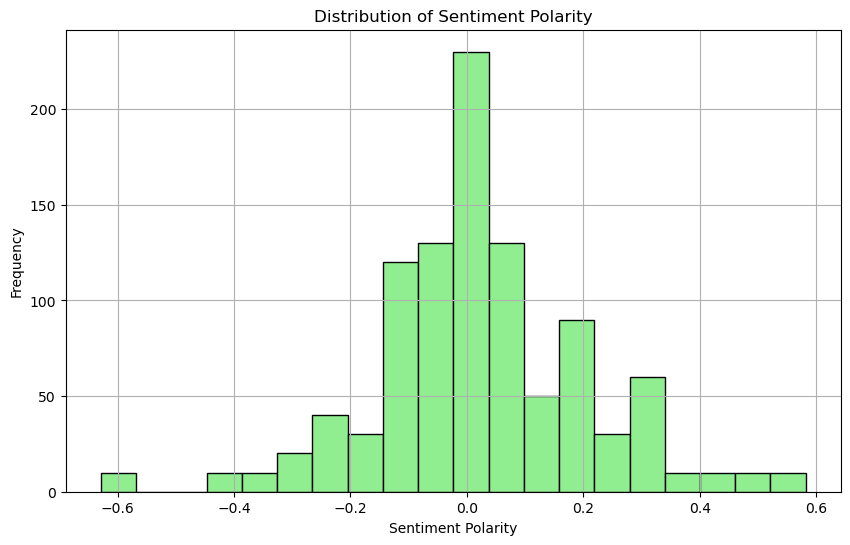

In [108]:
import matplotlib.pyplot as plt
from textblob import TextBlob
df['sentiment'] = df['reviews'].apply(lambda x: TextBlob(x).sentiment.polarity)
plt.figure(figsize=(10, 6))
plt.hist(df['sentiment'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribution of Sentiment Polarity')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aniru\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


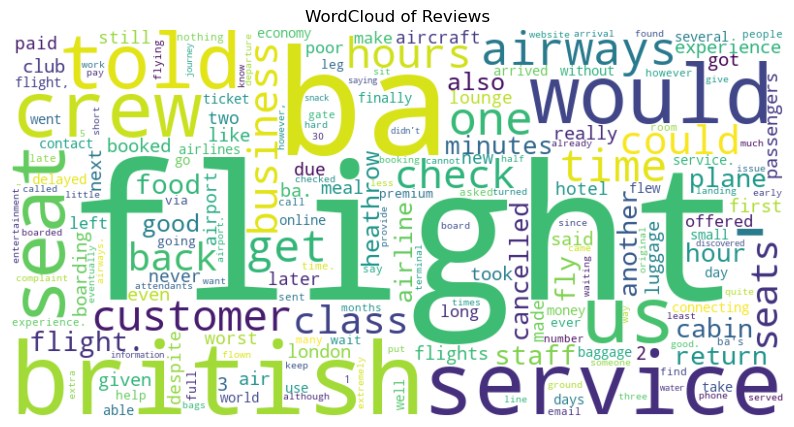

In [112]:
from collections import Counter
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
all_words = ' '.join(df['reviews']).lower()
stop_words = set(stopwords.words('english'))
words = [word for word in all_words.split() if word not in stop_words]

word_freq = Counter(words)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of Reviews')
plt.show()